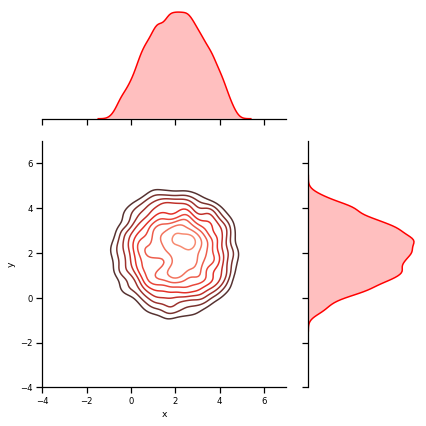

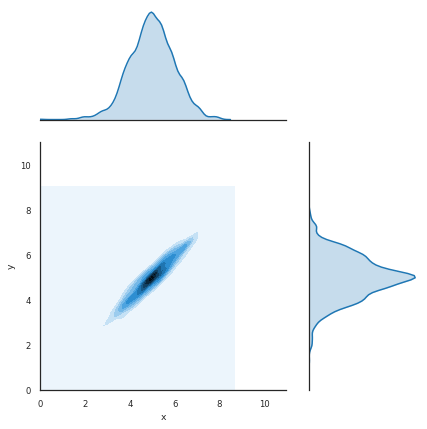

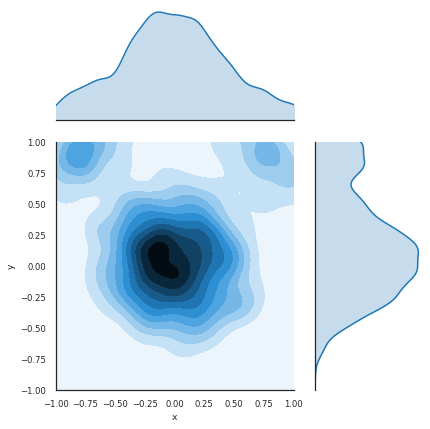

In [1]:
############################## 这个是不用任何Lib的MCMC ##############################
############ 这个notebook不是用来估计parameter的，只是用来展示Markov Chain 采样的过程，以及code的样子 ###############
# MCMC, Metropolis w/o Hastings
# Hastings: would be with Q
# Metropolis: without Q (slides) 就是Q(x去x') = Q(x‘去x) 这里主要试验的是Metropolis
import numpy as np
import scipy.stats as st 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

def circle(x, y): ############# 定义一个func来产生圆圈
    return -(x-2)**2 - (y-2)**2 + 3**2

def deadmaus5(x,y): ############# 随便定义了另外一个func 
    return (x**2+y**2-1)**3-x**2*y**3

def rosenbrock(x, y): ############# 对ML重要，尤其是找minima时有用
    return np.log(1+(1-x)**2 + 100*(y-x*x)**2)

def pgauss(x, y): ############# 定义了一个normalized的新的Gaussian by calling the Gaussian
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas) #给这个Gaussian加上mean和cov作为inputs，是个multivatiate Gaussian Dist. in 2D


########################## 这个是重头，会iterates，需要很多random #，也就是Markov Chain建立的过程
def metropolis_hastings(p, iter=100): ##### 这个p就是MCMC中的sample distribution，没必要非得是normalized，p是个2D func，可用上面任何一个，可以是% func也可以不是% func
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_, y_ = np.array([x, y]) + np.random.normal(size=2)###### 这里是给当前的array加上了新的数字，这只是一种做法，你也可以multiple上新的数字，目的是从当前state X 移开到X’，有很多种做法。code这里用 “_”代表上标
        if np.random.rand() < p( x_, y_ ) / p(x, y): ##### 这一步就是acceptance决定的一步，分子分母两个p不管p原本是什么func都在这里cancel掉了，下面的p相当于是normalizaion factor，则选什么func作为p无所谓，若用了上面的pgauss func，则x和y相当于一个normal plane当中的instances或samples from the Gaussian，要探索的parameters是mus 和 sigmas；p是不变的，唯一变的就是states即每个循环x_ & y_ 的值； 之后用np.random.rand()来draw random #，如果这个随机数 < Acceptance % which is p( x_, y_ ) / p(x, y)，则看是否进入if的主体；这个A %里面缺少的是“min [1,p( x_, y_ ) / p(x, y)]”这个样子的表达，这样的话如果p( x_, y_ ) / p(x, y)>1 那么这个if语句就没有必要了，因为uniform Dist.出来的所有值肯定都是<1的，即当前的if语句每次都接受新的state；
            x, y = x_, y_  ##### 进入这里，来改变x和y的值为新的state，即接受新的state
        samples[i] = np.array([x, y]) ##### 这里将MChain产生的所有samples保存成一个list；当distribution到一定循环次数后达到了peak了，你想要的其实是stay there；则对MCMC方法，你需要design it in certain way (取决于具体data) that the A% 大致等于75%；这个p( x_, y_ ) / p(x, y)的关系by design就会保证除出来的值不大可能太小，即你始终有一定比例的新state会被接受，若这个关系的结果太大，chain需要太长时间来出结果，如果太小，则chain就会stuck在有个地方，无法通过接受新的state来去别处；在本例中，用的是metropolis_hastings方法，则p( x_, y_ ) / p(x, y)基本保证肯定work

    return samples


mus = np.array([5, 5]) ##### 定义了一组mu
sigmas = np.array([[1, 0.95], [0.95, 1]])##### 定义了一组sigma，是个covariant matrix

#Circle sampling
samples = metropolis_hastings(circle, iter=10000) #####这里采用了上面的circle func来建立chain
data = pd.DataFrame(samples, columns=['x', 'y'])

#trying to set some styles
sns.set_context("notebook", font_scale=0.77)
#with sns.axes_style('white'):
#g=sns.jointplot("x", "y", data, kind="kde", space=0.2, scale=3, color="g", height=1093458760)
# g = sns.JointGrid(x="total_bill", y="tip", data=tips)
    #g.ax_joint.set_xticks([0, 0.34, 0.88]) # main labels
    #g.bx_joint.set_yticks([-0.1, 0.5, 1, 1.1])
g = sns.JointGrid(x="x", y="y", data=data,  xlim=(-4, 7), ylim=(-4, 7), ratio=2) #, height=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)


#Gaussian sampling
samples = metropolis_hastings(pgauss, iter=10000) #####这里采用了上面的新Gaussian func来建立chain
data = pd.DataFrame(samples, columns=['x', 'y'])

with sns.axes_style('white'):
    g= sns.jointplot("x", "y", data, kind='kde', xlim=(0, 11), ylim=(0,11), ratio=2);
    
    
#deadmau5 sampling
samples = metropolis_hastings(deadmaus5, iter=10000) #####这里采用了上面的deadmau5 func来建立chain
data = pd.DataFrame(samples, columns=['x', 'y'])

with sns.axes_style('white'):
    g= sns.jointplot("x", "y", data, kind='kde', xlim=(-1, 1), ylim=(-1,1), ratio=2);

